In [59]:
from google.colab import drive
import pandas as pd
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
df = pd.read_csv('/content/gdrive/My Drive/midwest.csv')

In [61]:
df

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,3048,WAUKESHA,WI,0.034,304715,8962.205880,298313,1096,672,2699,...,35.396784,7.667090,299802,98.387674,3.121060,3.785820,2.590061,4.085479,1,HLU
433,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,16.549869,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR
434,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,15.064584,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR
435,3051,WINNEBAGO,WI,0.035,140320,4009.142860,136822,697,685,1728,...,24.995504,5.659847,133950,95.460376,8.804031,10.592031,8.660587,6.661094,1,HAU


In [62]:
# 1) 데이터 특징 파아고하기
# 2) 전체인구poptotal변수를 total로, 아시아인구 popasian을 asian으로 수정
# 3) total, asian변수를 이용해 전체인구 대비 아시아인구 백분율 파생변수 추가하고 히스토그램 만들어 분포를 확인
# 4. 아시아인구 백분율 전체 평균 구하고 평균 초과하면 large, 아니면 small부여한 파생변수
# 5. large와 small에 해당하는 지역이 ㅓㅇㄹ마나 많은지 빈도표와 막대그래프를 그려보자

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   437 non-null    int64  
 1   county                437 non-null    object 
 2   state                 437 non-null    object 
 3   area                  437 non-null    float64
 4   poptotal              437 non-null    int64  
 5   popdensity            437 non-null    float64
 6   popwhite              437 non-null    int64  
 7   popblack              437 non-null    int64  
 8   popamerindian         437 non-null    int64  
 9   popasian              437 non-null    int64  
 10  popother              437 non-null    int64  
 11  percwhite             437 non-null    float64
 12  percblack             437 non-null    float64
 13  percamerindan         437 non-null    float64
 14  percasian             437 non-null    float64
 15  percother             4

In [64]:
df.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


In [65]:
# 2) 전체인구poptotal변수를 total로, 아시아인구 popasian을 asian으로 수정
df = df.rename(columns={'poptotal':'total','popasian':'asian'})
df

,PID,county,state,area,total,popdensity,popwhite,popblack,popamerindian,asian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,3048,WAUKESHA,WI,0.034,304715,8962.205880,298313,1096,672,2699,...,35.396784,7.667090,299802,98.387674,3.121060,3.785820,2.590061,4.085479,1,HLU
433,3049,WAUPACA,WI,0.045,46104,1024.533330,45695,22,125,92,...,16.549869,3.138596,44412,96.330036,8.488697,10.071411,6.953799,10.338641,0,AAR
434,3050,WAUSHARA,WI,0.037,19385,523.918919,19094,29,70,43,...,15.064584,2.620907,19163,98.854785,13.786985,20.050708,11.695784,11.804558,0,AAR
435,3051,WINNEBAGO,WI,0.035,140320,4009.142860,136822,697,685,1728,...,24.995504,5.659847,133950,95.460376,8.804031,10.592031,8.660587,6.661094,1,HAU


In [66]:
# 3) total, asian변수를 이용해 전체인구 대비 아시아인구 백분율 파생변수 추가하고 히스토그램 만들어 분포를 확인
df['asian_ratio'] = (df['asian']/df['total']*100).round(2)
df[['asian_ratio','percasian']]

,asian_ratio,percasian
0,0.38,0.376759
1,0.45,0.451722
2,0.11,0.106731
3,0.49,0.486918
4,0.09,0.085675
...,...,...
432,0.89,0.885746
433,0.20,0.199549
434,0.22,0.221821
435,1.23,1.231471


In [67]:
ar = df.groupby('state',as_index=False).agg(meanratio = ('asian_ratio','mean'))
ar

,state,meanratio
0,IL,0.563824
1,IN,0.382935
2,MI,0.506747
3,OH,0.433068
4,WI,0.555833


[(0.0, 1.0)]

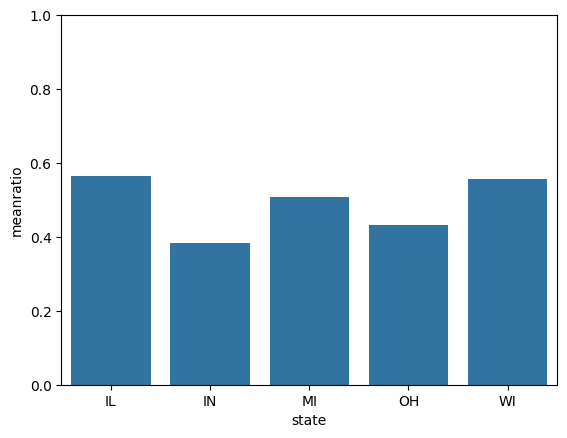

In [68]:
import seaborn as sns
sns.barplot(data = ar, x='state',y='meanratio').set(ylim = [0,1])

In [69]:
# 4. 아시아인구 백분율 전체 평균 구하고 평균 초과하면 large, 아니면 small부여한 파생변수
asian_avgp = df['asian_ratio'].mean()
asian_avgp

0.48725400457665907

In [70]:
import numpy as np
df['asian_above_avg'] = np.where(df['asian_ratio']>=asian_avgp, 'LARGE','SMALL')
df['asian_above_avg']

0      SMALL
1      SMALL
2      SMALL
3      LARGE
4      SMALL
       ...  
432    LARGE
433    SMALL
434    SMALL
435    LARGE
436    LARGE
Name: asian_above_avg, Length: 437, dtype: object

In [71]:
# 5. large와 small에 해당하는 지역이 ㅓㅇㄹ마나 많은지 빈도표와 막대그래프를 그려보자
a = df[['PID','asian_above_avg']]
a

,PID,asian_above_avg
0,561,SMALL
1,562,SMALL
2,563,SMALL
3,564,LARGE
4,565,SMALL
...,...,...
432,3048,LARGE
433,3049,SMALL
434,3050,SMALL
435,3051,LARGE


<Axes: xlabel='asian_above_avg', ylabel='count'>

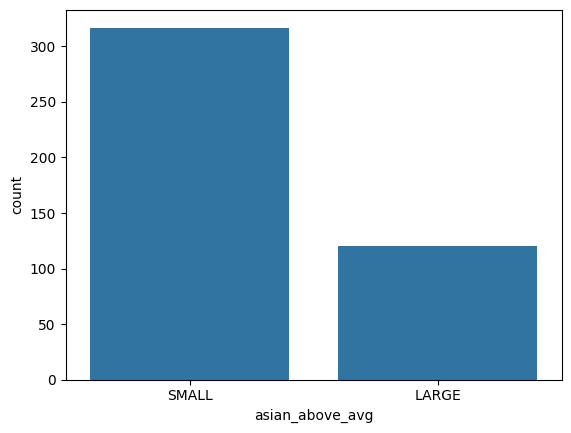

In [72]:
sns.countplot(data = df, x = 'asian_above_avg')